In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
abacate = pd.read_csv('Avocado.csv')
abacate.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany
1,2015-01-11,1.24,41195.08,1002.85,31640.34,127.12,8424.77,8036.04,388.73,0.0,conventional,2015,Albany
2,2015-01-18,1.17,44511.28,914.14,31540.32,135.77,11921.05,11651.09,269.96,0.0,conventional,2015,Albany
3,2015-01-25,1.06,45147.50,941.38,33196.16,164.14,10845.82,10103.35,742.47,0.0,conventional,2015,Albany
4,2015-02-01,0.99,70873.60,1353.90,60017.20,179.32,9323.18,9170.82,152.36,0.0,conventional,2015,Albany


In [3]:
abacate.columns = ['Data', 'Preco_medio', 'Volume_total', 'pequeno/medio', 'grande', 'Xgrande', 
                'Total_Bags', 'Small_Bags', 'Large','XLarge_Bags', 'tipo', 'ano', 'regiao']
#volume_total de vendas!

In [4]:
abacate.head()

,Data,Preco_medio,Volume_total,pequeno/medio,grande,Xgrande,Total_Bags,Small_Bags,Large,XLarge_Bags,tipo,ano,regiao
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany
1,2015-01-11,1.24,41195.08,1002.85,31640.34,127.12,8424.77,8036.04,388.73,0.0,conventional,2015,Albany
2,2015-01-18,1.17,44511.28,914.14,31540.32,135.77,11921.05,11651.09,269.96,0.0,conventional,2015,Albany
3,2015-01-25,1.06,45147.50,941.38,33196.16,164.14,10845.82,10103.35,742.47,0.0,conventional,2015,Albany
4,2015-02-01,0.99,70873.60,1353.90,60017.20,179.32,9323.18,9170.82,152.36,0.0,conventional,2015,Albany


In [10]:
#total da amostra
abacate.shape[0]

27323

In [12]:
# total de cada tipo de abacate
abacate['tipo'].value_counts() #conta o total de cada tipo de abacate

conventional    13662
organic         13661
Name: tipo, dtype: int64

In [13]:
# verificando o percentual de cada tipo de abacate na amostra
tipo_dado = (abacate['tipo'].value_counts()/abacate.shape[0])*100
print(tipo_dado )

conventional    50.00183
organic         49.99817
Name: tipo, dtype: float64


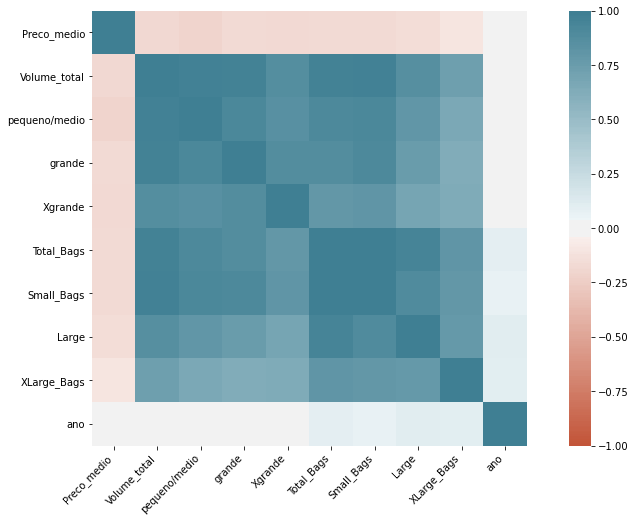

In [16]:
# Matriz de corelação
# verificar o nível de correlação entre as variáveis
plt.figure(figsize=(15,8)) 
corr = abacate.corr() 
ax = sns.heatmap(     
     corr,      
     vmin=-1, vmax=1, center=0,     
     cmap=sns.diverging_palette(20, 220, n=200),     
     square=True 
) 
ax.set_xticklabels(     
     ax.get_xticklabels(),     
     rotation=45,     
     horizontalalignment='right' 
);

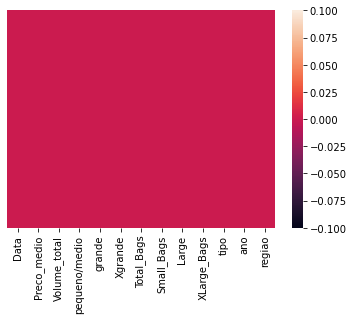

In [17]:
# verificando se há dados faltantes 
sns.heatmap(abacate.isnull(),yticklabels=False, cbar=True)

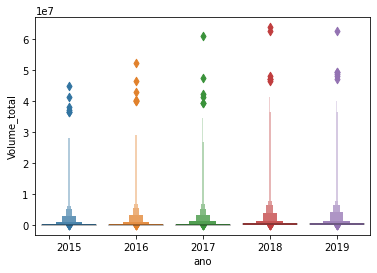

In [20]:
#Data querring 1
#o volume de vendas de abacate aumentou nos últimos anos?
sns.boxenplot(abacate.ano,abacate.Volume_total)

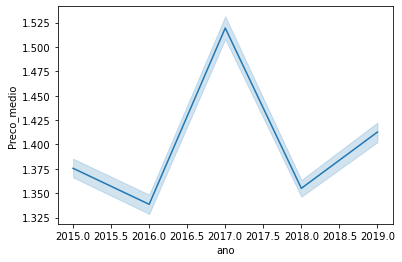

In [22]:
# Qual a variação de preços nos últimos anos?
sns.lineplot(abacate.ano,abacate.Preco_medio)

Text(0.5, 1.0, 'Preço médio anual por região em dolares')

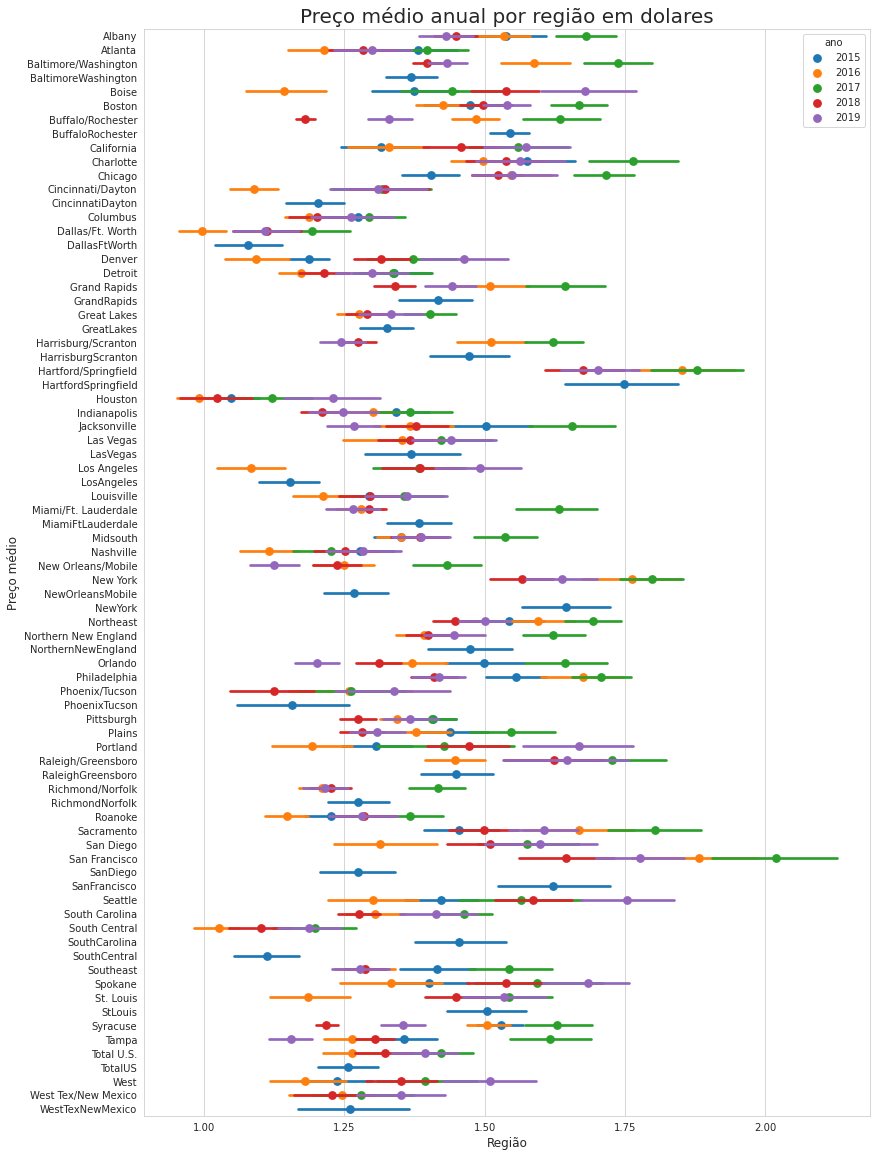

In [24]:
# Em qual lugar era possível comprar abacete mais barato em cada ano?
plt.figure(figsize=(13,20))
sns.set_style('whitegrid')
sns.pointplot(x='Preco_medio',y='regiao',data=abacate, hue='ano',join=False)
plt.xticks(np.linspace(1,2,5))
plt.xlabel('Região',{'fontsize' : 'large'})
plt.ylabel('Preço médio',{'fontsize':'large'})
plt.title("Preço médio anual por região em dolares",{'fontsize':20})